In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 


# Initialize the non-slippery Frozen Lake environment
environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
environment.reset()
environment.render()

# Initialize Q-table with zeros
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
qtable = np.zeros((16, 4))

# Alternatively, the gym library can also directly
# give us the number of states and actions using 
# "env.observation_space.n" and "env.action_space.n"
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)


Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [3]:
# 1. Randomly choose an action using action_space.sample()
action = environment.action_space.sample()

# 2. Implement this action and move the agent in the desired direction
new_state, reward, done, truncated, info = environment.step(action)

# Display the results (reward and map)
environment.render()
print(f'Reward = {reward}')

Reward = 0.0


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.        0.        0.59049   0.       ]
 [0.        0.        0.6561    0.       ]
 [0.        0.729     0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.81      0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.2784375 0.       ]
 [0.        0.9       0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        1.        0.       ]
 [0.        0.        0.        0.       ]]


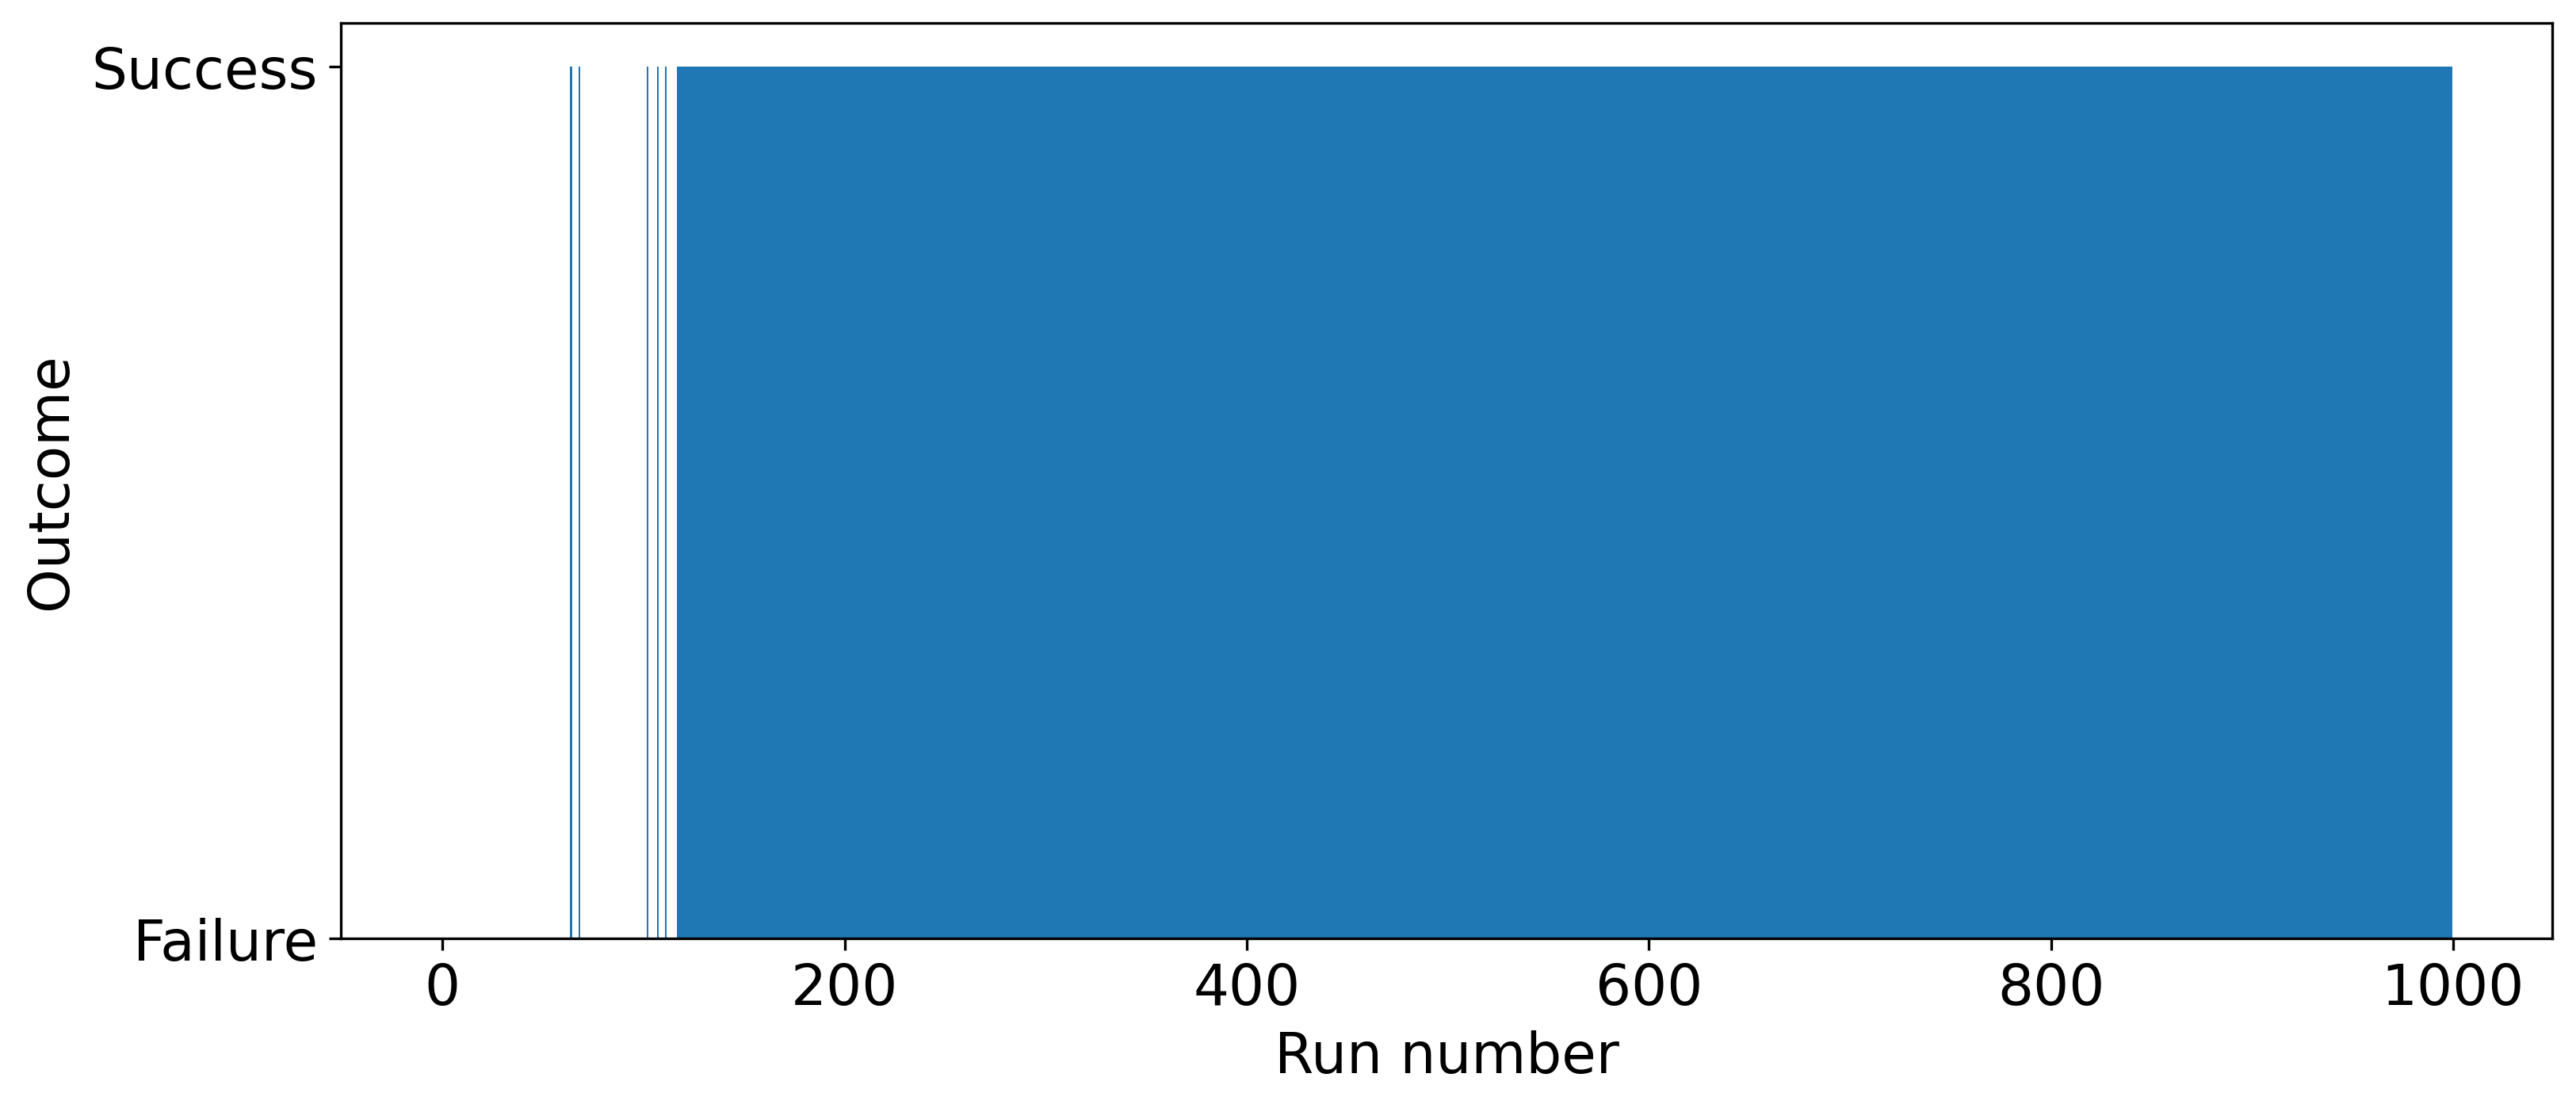

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    state = int(state[0])
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()        
    
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)


        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - 
                                qtable[state, action])
             
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [5]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(episodes):
    state = environment.reset()
    state = int(state[0])
    done = False
    
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
          
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)
       
        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [6]:
state = environment.reset()
state = int(state[0])
done = False
sequence = []

while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()
      
    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, truncated, info = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [2, 2, 1, 1, 1, 2]


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59048824]
 [0.59026466 0.729      0.58953    0.65507142]
 [0.6559141  0.         0.23346266 0.49491454]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.65609882]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80999452 0.9        0.72893176]
 [0.81       0.9        1.         0.81      ]
 [0.

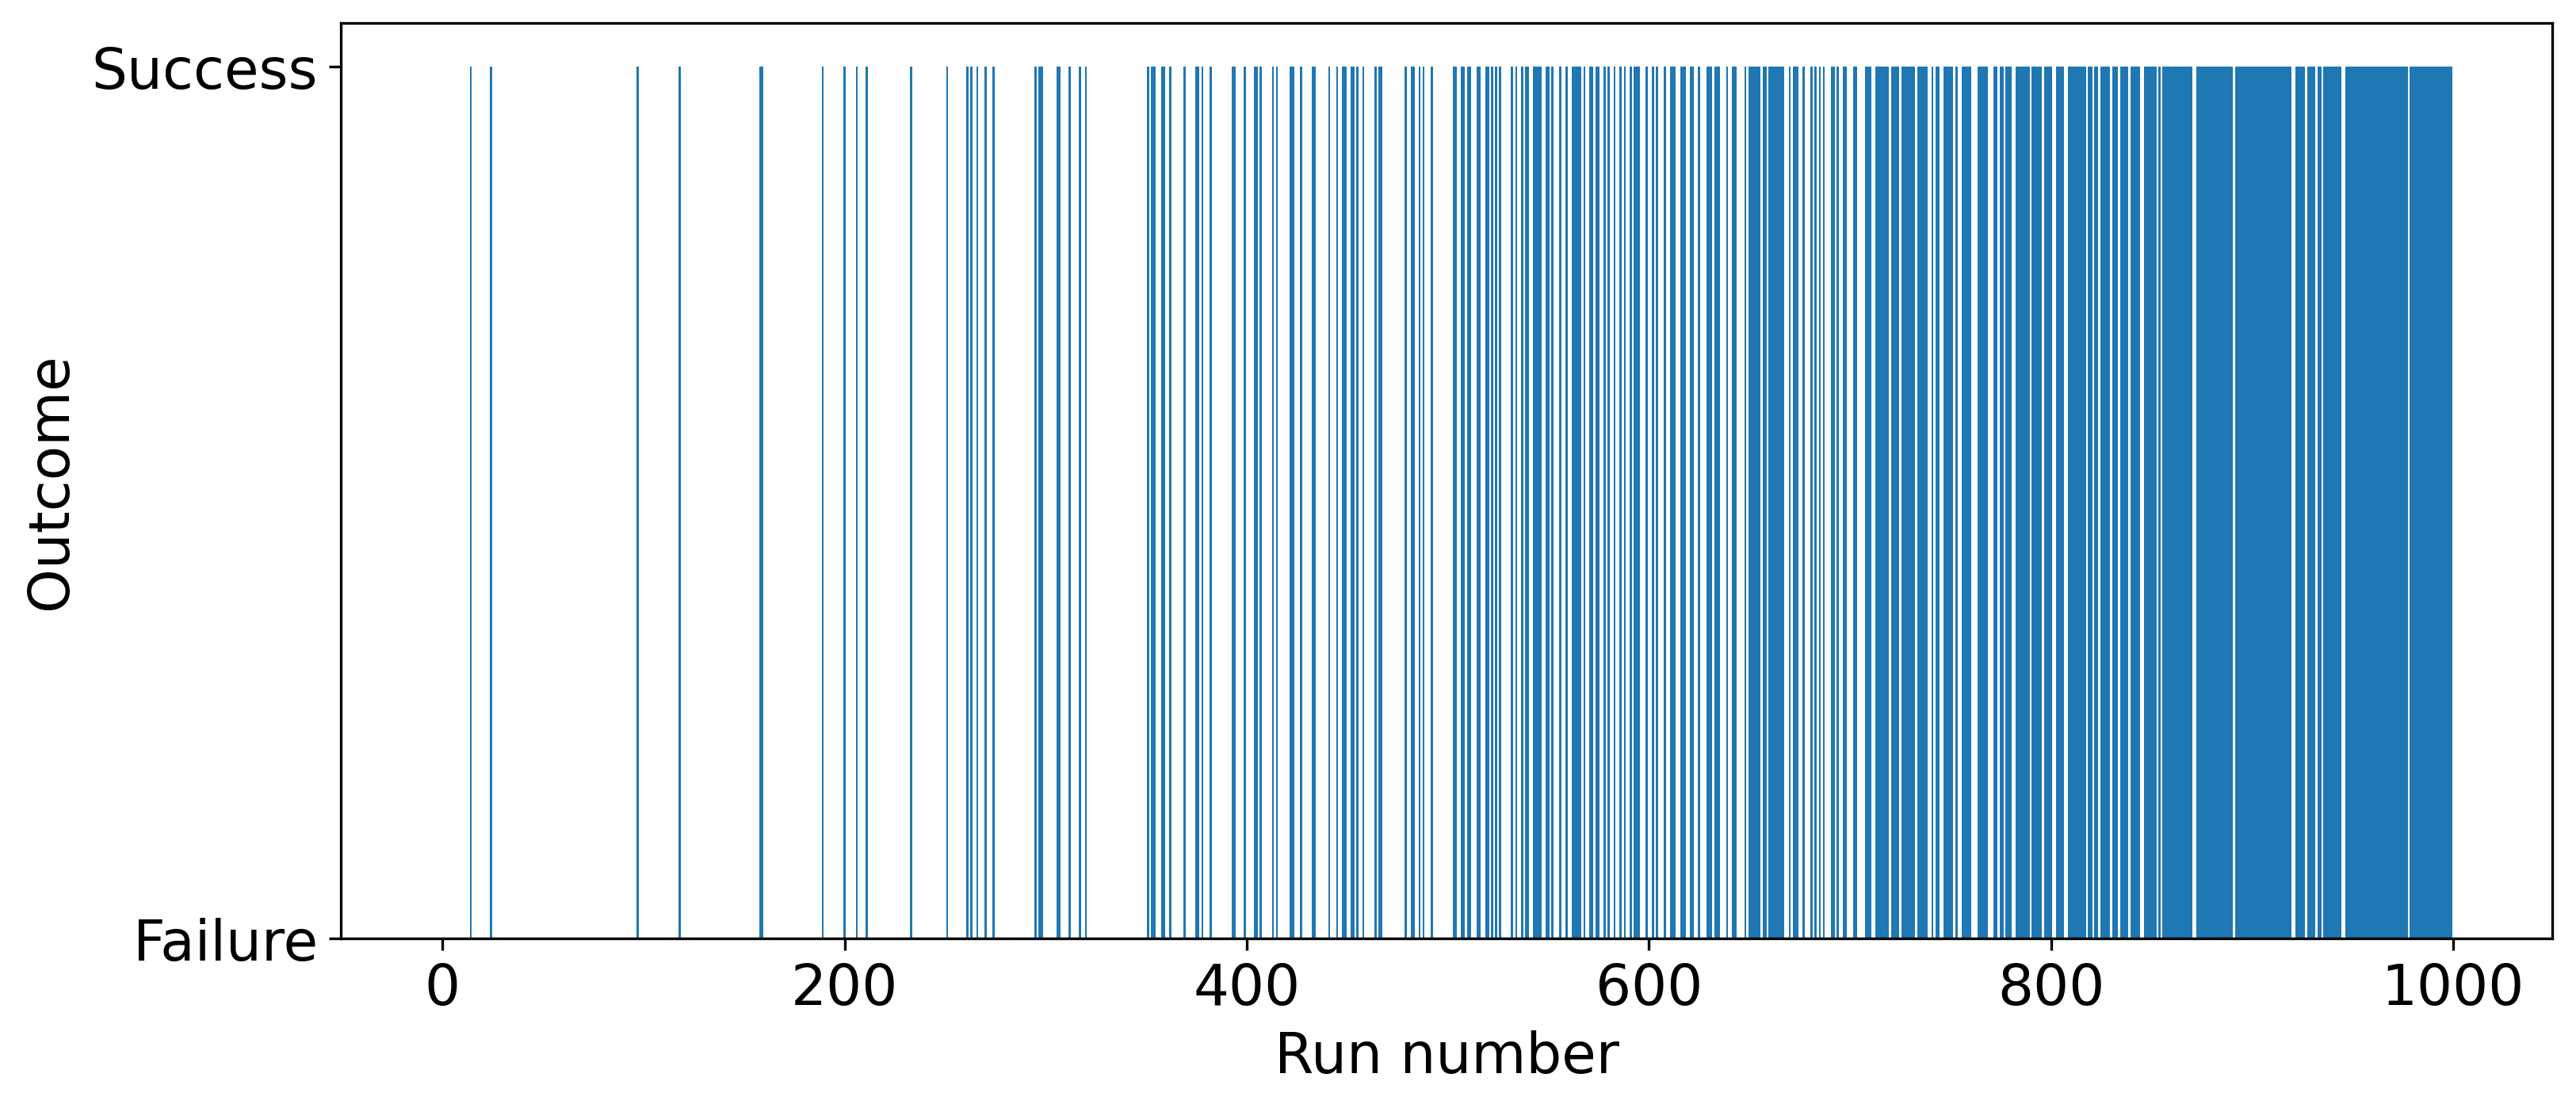

In [7]:
# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episode
salpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
    state = environment.reset()
    state = int(state[0])
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")
    
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()
        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state])
        
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [8]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()
    state = int(state[0])
    done = False
   
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncated, info = environment.step(action)
    

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [9]:
# Initialize the slippery Frozen Lake
environment = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)


def training(environment, qtable ,episodes, alpha, gamma, epsilon, epsilon_decay):
  # Training
  for _ in range(episodes):
      state = environment.reset()
      state = int(state[0])
      done = False

      # By default, we consider our outcome to be a failure
      outcomes.append("Failure")
      
      # Until the agent gets stuck in a hole or reaches the goal, keep training it
      while not done:
          # Generate a random number between 0 and 1
          rnd = np.random.random()

          # If random number < epsilon, take a random action
          if rnd < epsilon:
            action = environment.action_space.sample()

          # Else, take the action with the highest value in the current state
          else:
            action = np.argmax(qtable[state])
        
          # Implement this action and move the agent in the desired direction
          new_state, reward, done, truncated, info = environment.step(action)

          # Update Q(s,a)
          qtable[state, action] = qtable[state, action] + \
                                  alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        
          # Update our current state
          state = new_state

          # If we have a reward, it means that our outcome is a success
          if reward:
            outcomes[-1] = "Success"

      # Update epsilon
      epsilon = max(epsilon - epsilon_decay, 0)
  
  return qtable, outcomes



def show_results(environment, qtable, outcomes):

  print()
  print('===========================================')
  print('Q-table after training:')
  print(qtable)

  # Plot outcomes
  plt.figure(figsize=(12, 5))
  plt.xlabel("Run number")
  plt.ylabel("Outcome")
  ax = plt.gca()
  plt.bar(range(len(outcomes)), outcomes, width=1.0)
  plt.show()

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]



Q-table after training:
[[0.02291681 0.08070039 0.01795944 0.01812921]
 [0.0106532  0.00520188 0.00812958 0.06942083]
 [0.07968736 0.01502974 0.01594941 0.0159817 ]
 [0.00795533 0.01209251 0.01126824 0.01615774]
 [0.16602262 0.01280072 0.00419912 0.00975925]
 [0.         0.         0.         0.        ]
 [0.00848371 0.02927135 0.04728547 0.00424662]
 [0.         0.         0.         0.        ]
 [0.01285417 0.01378276 0.04627141 0.2311082 ]
 [0.06083166 0.24663661 0.04936393 0.02638265]
 [0.21256361 0.01773429 0.04242298 0.033936  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.10517284 0.11531699 0.54051596 0.08162897]
 [0.19347634 0.20100705 0.55156801 0.19172401]
 [0.         0.         0.         0.        ]]


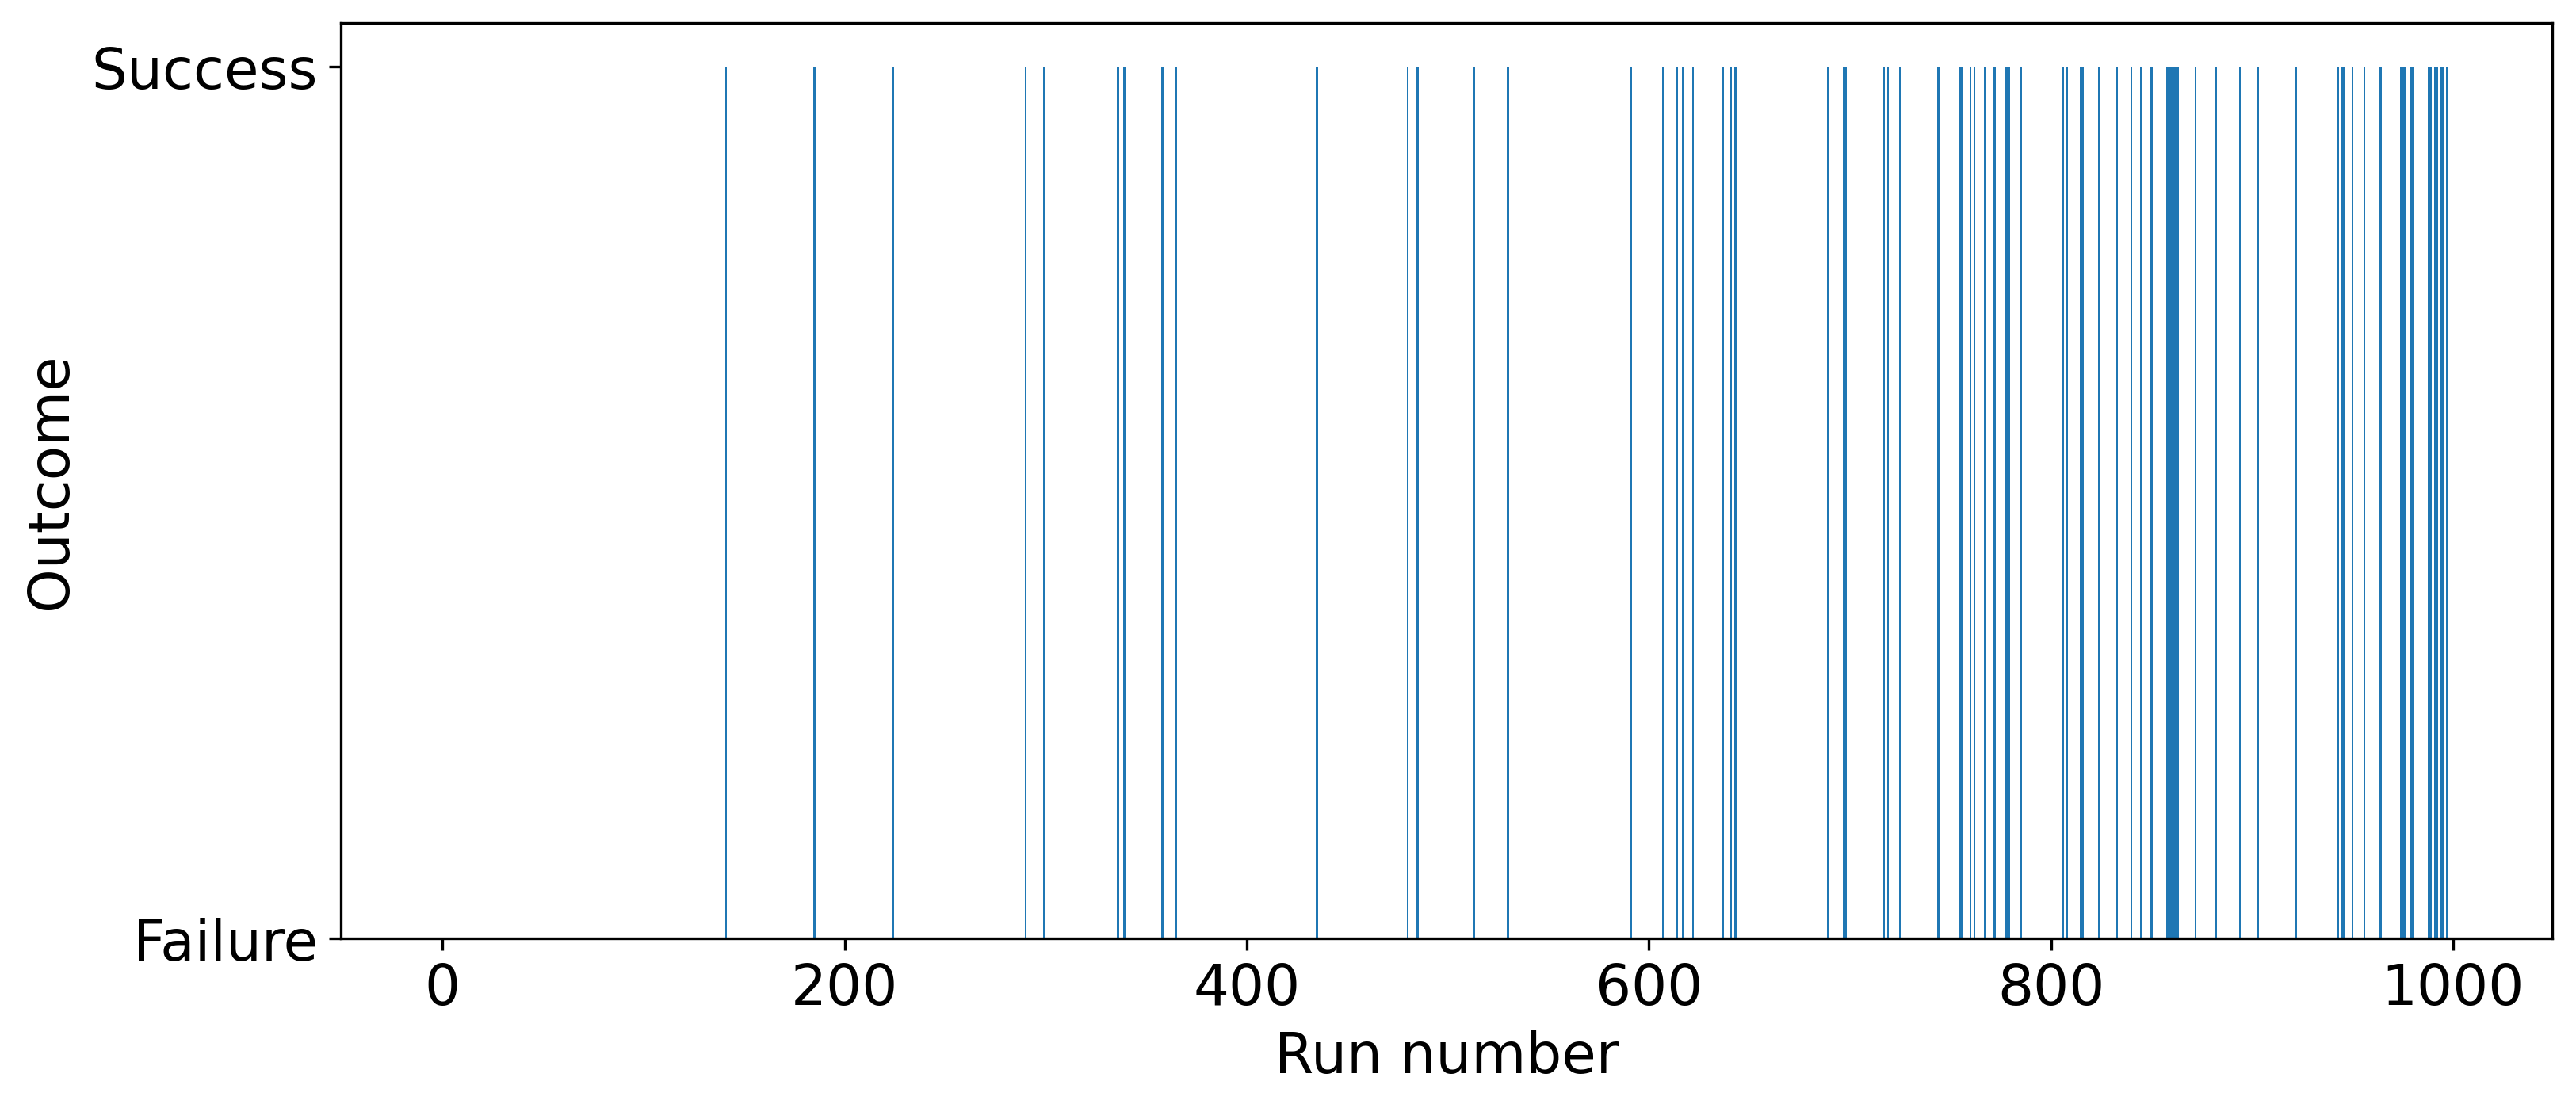

In [10]:
qtable, outcomes = training(environment, qtable, episodes, alpha, gamma, epsilon, epsilon_decay)
show_results(environment, qtable, outcomes)


In [11]:
def get_success_rate(environment, qtable, episodes):
  nb_success = 0

  # Evaluation
  for _ in range(episodes):
      state = environment.reset()
      state = int(state[0])
      done = False
      
      # Until the agent gets stuck or reaches the goal, keep training it
      while not done:
          # Choose the action with the highest value in the current state
          action = np.argmax(qtable[state])

          # Implement this action and move the agent in the desired direction
          new_state, reward, done, truncated, info = environment.step(action)

          # Update our current state
          state = new_state

          # When we get a reward, it means we solved the game
          nb_success += reward

  # Let's check our success rate!
  return nb_success/episodes*100

In [12]:
print(f"Success rate = {get_success_rate(environment, qtable, episodes)}%")

Success rate = 47.099999999999994%


<h1>Mejoras</h1>

Cambiamos los valores de alpha, gamma, epsilon, y el incremento de epsilon, y a su vez aumentamos el numero de episodios para aumentar el rendimiento


Q-table after training:
[[2.22372773e-01 2.18652797e-02 2.20928703e-02 2.36050758e-02]
 [8.89704635e-03 5.64594468e-03 6.92058034e-03 1.59301926e-01]
 [1.13073789e-01 4.84318468e-03 7.27318751e-03 7.24492274e-03]
 [2.37715880e-03 2.71946335e-03 2.63758439e-03 7.38854952e-03]
 [2.93359156e-01 1.75462596e-02 1.94035414e-02 1.21777246e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.27458716e-03 1.60617106e-04 6.99433109e-05 8.77659030e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.34057742e-02 2.37269582e-02 1.51538223e-02 4.31844237e-01]
 [1.29276750e-02 2.68092320e-01 1.56066086e-02 1.74733451e-02]
 [5.71209414e-01 4.05051058e-03 5.24013476e-03 5.04849988e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.86821763e-02 7.40320419e-02 3.95894171e-01 6.27556698e-02]
 [8.30604734e-02 9.28019145e-01 1.38077490e-01 1.37349770e-01]
 [0.00000000e+00 0.00000000e+0

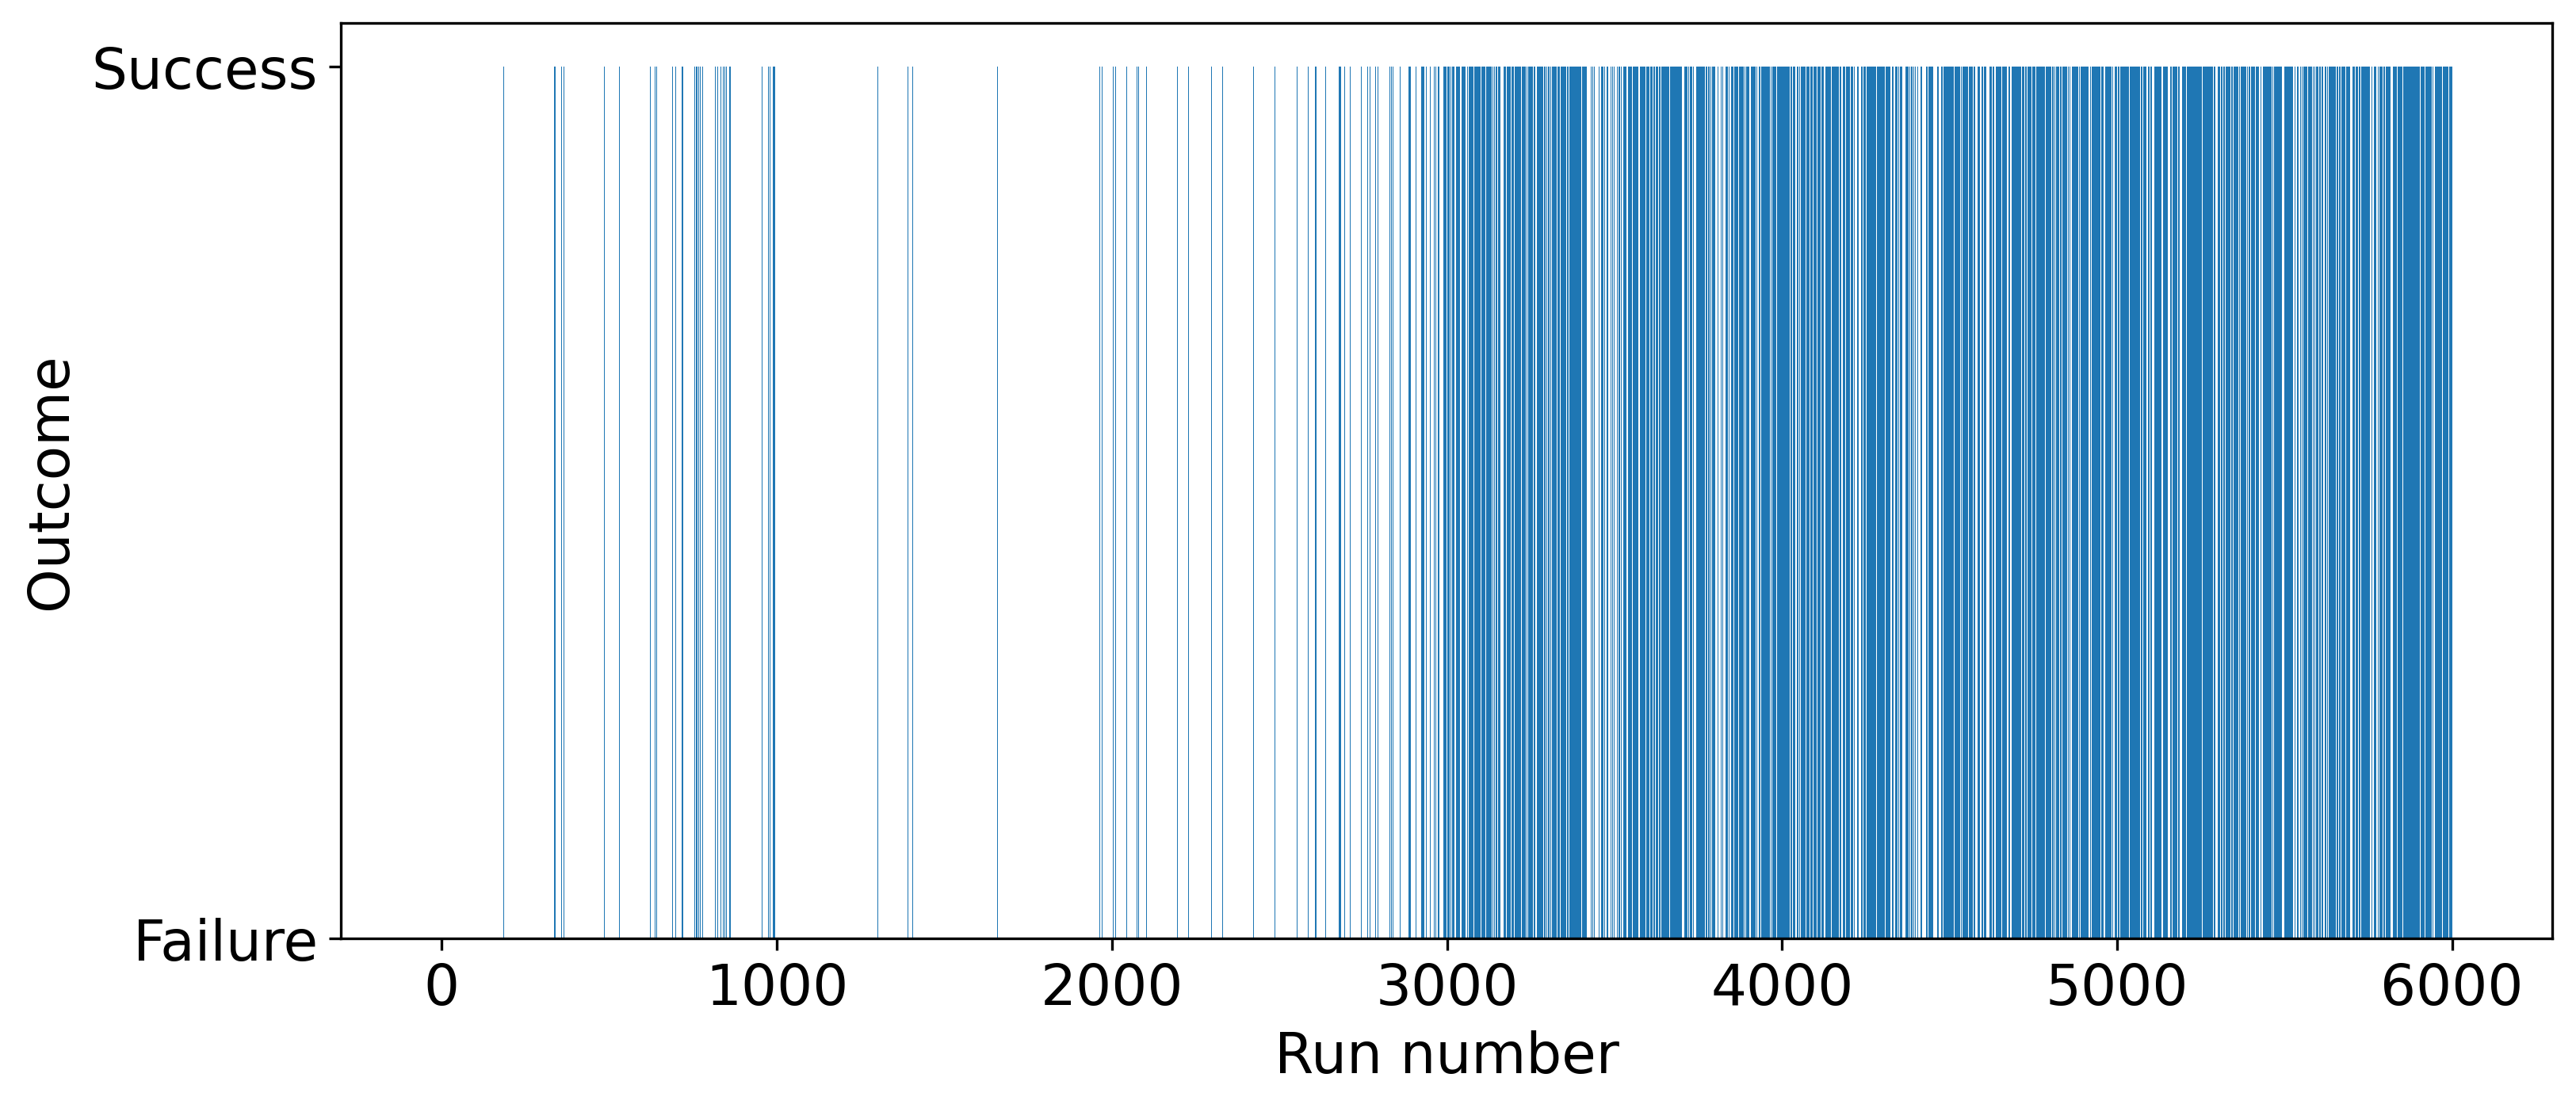

Success rate = 77.8%


In [13]:
# Initialize the slippery Frozen Lake
environment = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 5000        # Incrementamos el numero de episodios
alpha = 0.7            # Ajustamos la tasa de aprendizaje
gamma = 0.95            # Ajustamos el factor de descuento
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.0005  # Hacemos que epsilon decaiga mas lentamente

qtable, outcomes = training(environment, qtable, episodes, alpha, gamma, epsilon, epsilon_decay)
show_results(environment, qtable, outcomes)
print(f"Success rate = {get_success_rate(environment, qtable, episodes)}%")

In [14]:
best_success_rate = 0
best_params = {}
contador = 0

for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    for gamma in [0.8, 0.85, 0.9, 0.95, 0.99]:
        for epsilon_decay in [0.0001, 0.0005, 0.001, 0.005]:
            contador += 1
            print("Iteración", contador)
            table = np.zeros((environment.observation_space.n, environment.action_space.n))
            qtable, outcomes = training(environment, table, episodes, alpha, gamma, epsilon, epsilon_decay)
            success_rate = get_success_rate(environment, qtable, episodes)
            if success_rate > best_success_rate:
                best_success_rate = success_rate
                best_params = {'alpha': alpha, 'gamma': gamma, 'epsilon_decay': epsilon_decay}

print("Mejor tasa de éxito:", best_success_rate)
print("Mejores parámetros:", best_params)

Iteración 1
Iteración 2
Iteración 3
Iteración 4
Iteración 5
Iteración 6
Iteración 7
Iteración 8
Iteración 9
Iteración 10
Iteración 11
Iteración 12
Iteración 13
Iteración 14
Iteración 15
Iteración 16
Iteración 17
Iteración 18
Iteración 19
Iteración 20
Iteración 21
Iteración 22
Iteración 23
Iteración 24
Iteración 25
Iteración 26
Iteración 27
Iteración 28
Iteración 29
Iteración 30
Iteración 31
Iteración 32
Iteración 33
Iteración 34
Iteración 35
Iteración 36
Iteración 37
Iteración 38
Iteración 39
Iteración 40
Iteración 41
Iteración 42
Iteración 43
Iteración 44
Iteración 45
Iteración 46
Iteración 47
Iteración 48
Iteración 49
Iteración 50
Iteración 51
Iteración 52
Iteración 53
Iteración 54
Iteración 55
Iteración 56
Iteración 57
Iteración 58
Iteración 59
Iteración 60
Iteración 61
Iteración 62
Iteración 63
Iteración 64
Iteración 65
Iteración 66
Iteración 67
Iteración 68
Iteración 69
Iteración 70
Iteración 71
Iteración 72
Iteración 73
Iteración 74
Iteración 75
Iteración 76
Iteración 77
Iteració

Y con esto ya hemos optimizado la tasa de exito del agente.